### Carregando o modelo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import json
import string
import spacy
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
from keras.models import load_model

In [3]:
def loadModel():
    name = input('escreva o nome do modelo a ser carregado:')
    savedModel = load_model(name+'.h5')
    with open('wordIndex.json') as f:
        dicto = json.load(f)
    savedModel.summary()
    return savedModel, dicto

In [4]:
tokenizer = Tokenizer()
model, tokenizer.word_index = loadModel()

escreva o nome do modelo a ser carregado:treinoVec-trunc-150-20epo-acc82
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          9235900   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 9,353,277
Trainable params: 117,377
Non-trainable params: 9,235,900
_________________________________________________________________


### Notícias analisadas - True

In [18]:
true=[]
for i in range(1,54):
    try:
        with open(r'C:\Users\nakamura lucas\Documents\Python Projects\Fake\3.noticias_true_maio22\\'+str(i)+'.txt', encoding ="utf8") as t:
        #with open(r'C:\Users\vitor\Documents\TCC.v3\3.noticias_true_maio22\\'+str(i)+'.txt', encoding ="utf8") as t:
            true.append(t.read())
    except:
        pass

In [19]:
labels = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1]
len(labels)

53

In [20]:
 df = pd.DataFrame(list(zip(true,labels)),columns=['true','labels'])

### Preprocessing

In [8]:
# Carregando o pacote de língua portuguesa para o processador Spacy
nlp = spacy.load('pt_core_news_sm')

In [9]:
# Defininido funções de preprocessamento

def removePunct(text):
    '''
    Removes any punctuation included in string.punctuation.
    '''
    translator = text.maketrans({key:'' for key in string.punctuation+'“”'}) # Translates any punctuation into ''
    return text.translate(translator)

def removeNumbers(text):
    '''
    Removes any number character in text.
    '''
    return re.sub('[0-9]', '' , text) # Translates any number into ''

def removeStopWords(string):
    '''
    Removes any portuguese stopwords, using Spacy's standard package.
    '''
    doc = nlp(string)
    return ' '.join([token.text for token in doc if token.is_stop is False])

def lemmatize(string):
    '''
    Lemmatizes text word-by-word. Notice that lemmatizing is not as harsh as stemming, which makes the final text easier to read and understand in common language.
    '''
    doc = nlp(string)
    return ' '.join([token.lemma_ for token in doc])

def prep(string, useStopWords = False, lemma = False):
    '''
    Executes previously defined preprocessing in text.
    '''

    result = removeNumbers(removePunct(string)).lower()
    
    if useStopWords and lemma:
        doc = nlp(result)
        result = ' '.join([token.lemma_ for token in doc if token.is_stop is False])
    elif useStopWords:
        doc = nlp(result)
        result = ' '.join([token.text for token in doc if token.is_stop is False])
    elif lemma:
        doc = nlp(result)
        result = ' '.join([token.lemma_ for token in doc])

    result = result.replace('\n',"")
    
    return result

In [23]:
sentence_t = df['true'].apply(prep)

In [24]:
sentence_t[0]

'o presidente jair bolsonaro disse que caso avance na disputa irá participar de debates somente no segundo turno das eleições deste ano em entrevista ao apresentador carlos massa o ratinho em seu programa de rádio e televisão que foi ao ar nesta terçafeira bolsonaro falou ainda sobre terceira via desistência de joão doria e alianças— no segundo turno eu vou participar no primeiro turno a gente pensa porque se eu for os  candidatos vão querer dar pancada em mim e eu não vou ter tempo para responder eu acho que o debate deveria ser perguntas préacertadas antes para não baixar o nível — disse bolsonaro ao apresentadora última pesquisa do datafolha apontou que o expresidente luiz inácio lula da silva pt segue na liderança da corrida pela presidência com bolsonaro pl na segunda colocação lula aparece com  das intenções de voto enquanto bolsonaro tem  a margem de erro é de dois pontos para mais ou para menosquestionado pelo apresentador acerca de sua opinião em relação à saída de joão doria 

### Classificação Trues

In [27]:
lista_t = []
lista_t.append(sentence_t)
lista_t

maxlen = 150
sequences_t = tokenizer.texts_to_sequences(sentence_t)
padded_t = pad_sequences(sequences_t, maxlen=maxlen, padding='post',truncating='pre')

y_pred = (model.predict(padded_t) >=0.5).astype(int)

In [31]:
print(accuracy_score(labels, y_pred))
print(precision_score(labels, y_pred))
print(recall_score(labels, y_pred))
print(f1_score(labels, y_pred))

0.8301886792452831
0.25
1.0
0.4


Text(69.0, 0.5, 'Truth')

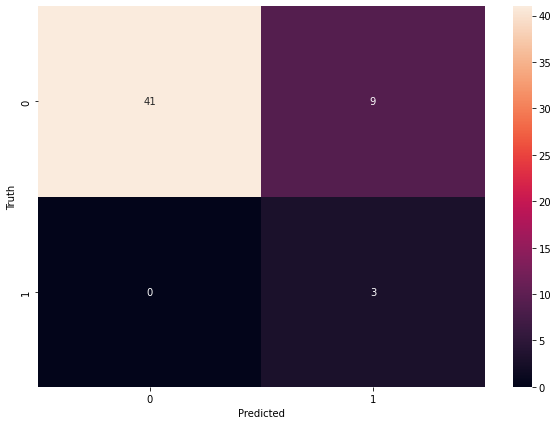

In [32]:
cm = tf.math.confusion_matrix(labels=labels,predictions=y_pred)

plt.figure(figsize= (10,7))
sns.heatmap(data=cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classificação Fakes

In [34]:
sentence_f = '''Bolsonaro põe fim ao seu casamento e isolada ex-mulher O casamento de Michelle e Jair Bolsonaro chegou ao fim. O casal passa por uma crise complexa desde novembro de 2018, depois que Jair foi eleito Presidente do Brasil.
 
O site de cobertura e fatos de celebridades e famosos, [site] foi o primeiro site a revelar a separação do casal no dia 13 de outubro de 2020. Na terça-feira o mesmo site revelou que a ex-primeira dama e esposa de Bolsonaro – Michelle Bolsonaro tem sofrido com o fim do casamento e se sentido isolada.

O Custo da vila Olímpica do Japão: 29 milhões de dólares. O custo da vila Olímpica na olimpíada do Brasil: 900 milhões de dólares. e pra variar quem governava o Brasil na época: PT e Lula, quem ganhou muito dinheiro: políticos envolvidos na corrupção, e a globolixo

NO RIO GRANDE DO SUL PRODUTORES DE UVA TOMAM MEDIDAS PARA EVITAR A GEADA NO RIO GRANDE DO SUL PRODUTORES DE UVA TOMAM MEDIDAS PARA EVITAR A GEADA Conforme informações do diário da informação em Bento Gonçalves para não congelar as uvas os produtores estão utilizando o fogo em tonéis, a técnica já é usada há alguns anos no Brasil e em outros países. Além da proteção é mais um espetáculo na Serra Gaúcha.

Lula admite DERROTA em discurso de 1º de Maio. O discurso de Lula que era para ser às 12:00hs foi mudado para às 13:00 e só começou às 15:30. Tudo porque não tinha gente o suficiente. No discurso Lula diz que ainda não é candidato. Ele disse: “só dia 7 eu vou ser pré-candidato”. Será que já arregou?

Bolsonaro põe fim ao seu casamento e isolada ex-mulher O casamento de Michelle e Jair Bolsonaro chegou ao fim. O casal passa por uma crise complexa desde novembro de 2018, depois que Jair foi eleito Presidente do Brasil.
 
O site de cobertura e fatos de celebridades e famosos, [site] foi o primeiro site a revelar a separação do casal no dia 13 de outubro de 2020. Na terça-feira o mesmo site revelou que a ex-primeira dama e esposa de Bolsonaro – Michelle Bolsonaro tem sofrido com o fim do casamento e se sentido isolada.

O Custo da vila Olímpica do Japão: 29 milhões de dólares. O custo da vila Olímpica na olimpíada do Brasil: 900 milhões de dólares. e pra variar quem governava o Brasil na época: PT e Lula, quem ganhou muito dinheiro: políticos envolvidos na corrupção, e a globolixo

NO RIO GRANDE DO SUL PRODUTORES DE UVA TOMAM MEDIDAS PARA EVITAR A GEADA NO RIO GRANDE DO SUL PRODUTORES DE UVA TOMAM MEDIDAS PARA EVITAR A GEADA Conforme informações do diário da informação em Bento Gonçalves para não congelar as uvas os produtores estão utilizando o fogo em tonéis, a técnica já é usada há alguns anos no Brasil e em outros países. Além da proteção é mais um espetáculo na Serra Gaúcha.

Lula admite DERROTA em discurso de 1º de Maio. O discurso de Lula que era para ser às 12:00hs foi mudado para às 13:00 e só começou às 15:30. Tudo porque não tinha gente o suficiente. No discurso Lula diz que ainda não é candidato. Ele disse: “só dia 7 eu vou ser pré-candidato”. Será que já arregou?'''

In [41]:
sentence_f = '''Os Estados Unidos continuam em choque após a morte de 21 pessoas, entre elas 19 crianças, em um ataque em uma escola na cidade de Uvalde, no Texas. O presidente Joe Biden anunciou na quarta-feira (25) que iria ao estado nos próximos dias, onde políticos pró e contra armas se opõem.

Eram 11h30 em Uvalde, no estado americano do Texas, quando Salvador Ramos começou a atirar em alunos e professores da escola de ensino fundamental Robb, matando 21 pessoas, entre elas 19 crianças, na terça-feira (24).

Celeste estava no carro quando ouviu no rádio que um incidente estava acontecendo na escola de sua filha de 9 anos. A mãe de família, de 30 anos, correu para o local. Quando chegou, os policiais a impediram de entrar na escola e, na mesma hora, o atirador saiu do prédio e atirou na direção dos agentes.
"Ele saiu e começou a atirar em todo mundo. Eu fiquei com muito medo", conta. Poucos minutos depois, tiros voltaram a ser ouvidos no interior do centro de ensino. A filha de Celeste ainda estava no prédio.

"Ela ficou escondida no banheiro o tempo todo. Ela tentou sair e ele atirou bem na frente dela. Então ela parou e se escondeu em outro lugar. Ela então viu o atirador correr e atirar e se escondeu durante 15 minutos e depois começou a correr para a primeira porta aberta", conta Celeste, que conseguiu encontrar a filha viva.

"Nessa hora eu pulei, a agarrei e a coloquei dentro do meu carro. Então eu esperei que os filhos de duas amigas minhas saíssem, mas eles não saíram", diz a mãe emocionada.

"Eu estou triste, simplesmente triste. Faltam palavras. Grotesco, desprezível. Eram crianças inocentes. Elas tinham a vida diante delas, um futuro. Tudo isso foi roubado", disse outro pai de um sobrevivente.'''

In [58]:
lista_f = []
lista_f.append(sentence_f)

maxlen = 150
sequences_f = tokenizer.texts_to_sequences(lista_f)
padded_f = pad_sequences(sequences_f, maxlen=maxlen)

if (model.predict(padded_f) >=0.5).astype(int) == 0:
    print('Esta notícia provavelmente é verdadeira.')
else:
    print('Esta notícia provavelmente é falsa!')

1/1 [==============================] - 0s 33ms/step
Esta notícia provavelmente é falsa!
